Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

In [1]:
import pandas as pd 
df0=pd.read_csv(r"D:\bike_case\202207-divvy-tripdata.csv")
df1=pd.read_csv(r"D:\bike_case\202208-divvy-tripdata.csv")
df2=pd.read_csv(r"D:\bike_case\202209-divvy-publictripdata.csv")
df3=pd.read_csv(r"D:\bike_case\202210-divvy-tripdata.csv")
df4=pd.read_csv(r"D:\bike_case\202211-divvy-tripdata.csv")
df5=pd.read_csv(r"D:\bike_case\202212-divvy-tripdata.csv")
df6=pd.read_csv(r"D:\bike_case\202301-divvy-tripdata.csv")
df7=pd.read_csv(r"D:\bike_case\202302-divvy-tripdata.csv")
df8=pd.read_csv(r"D:\bike_case\202303-divvy-tripdata.csv")
df9=pd.read_csv(r"D:\bike_case\202304-divvy-tripdata.csv")
df10=pd.read_csv(r"D:\bike_case\202305-divvy-tripdata.csv")
df11=pd.read_csv(r"D:\bike_case\202306-divvy-tripdata.csv")
df12=pd.read_csv(r"D:\bike_case\202307-divvy-tripdata.csv")

In [2]:
data=pd.concat([df0, df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0)

In [3]:
import pandas as pd 
from datetime import datetime


In [4]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767645,57F5743A5828DA62,electric_bike,2023-07-14 19:17:13,2023-07-14 19:26:31,NaN,NaN,California Ave & Division St,13256,41.910000,-87.680000,41.903029,-87.697474,member
767646,2FF218D4C8F0EF1C,electric_bike,2023-07-14 19:16:13,2023-07-14 19:16:16,NaN,NaN,NaN,NaN,41.910000,-87.680000,41.910000,-87.680000,member
767647,2661FBD1F5A1C76D,electric_bike,2023-07-15 13:34:00,2023-07-15 13:43:13,NaN,NaN,NaN,NaN,41.940000,-87.650000,41.930000,-87.640000,member
767648,9CF4B70C23E033B1,electric_bike,2023-07-06 20:52:09,2023-07-06 21:01:13,NaN,NaN,NaN,NaN,41.910000,-87.630000,41.930000,-87.640000,member


In [5]:
data = data.dropna()


In [6]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983047 entries, 0 to 767626
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 532.2+ MB


In [8]:
#converting object date columns to date
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

data.info()

C:\Users\PC\AppData\Local\Temp\ipykernel_7916\3073981643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['started_at'] = pd.to_datetime(data['started_at'])


<class 'pandas.core.frame.DataFrame'>
Index: 4983047 entries, 0 to 767626
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 532.2+ MB


C:\Users\PC\AppData\Local\Temp\ipykernel_7916\3073981643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ended_at'] = pd.to_datetime(data['ended_at'])


In [9]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767338,3B228F52743C58B7,classic_bike,2023-07-21 13:13:48,2023-07-21 15:08:04,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,casual
767444,67BE62CFD9B1E3EA,electric_bike,2023-07-17 13:45:41,2023-07-17 13:45:43,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922667,-87.697114,41.922695,-87.697153,member
767535,E771BD59731AEC4D,electric_bike,2023-07-26 18:05:32,2023-07-26 18:18:23,Kenosha & Wellington,361,Kenosha & Wellington,361,41.934455,-87.733782,41.934442,-87.733780,member
767594,70B7A0759219DB7E,electric_bike,2023-07-13 13:38:44,2023-07-13 13:39:21,Kedzie Ave & Lake St,KA1504000106,Kedzie Ave & Lake St,KA1504000106,41.884788,-87.706334,41.884603,-87.706304,member


In [10]:
data["member_casual"].value_counts(normalize=True)

member_casual
member    0.614508
casual    0.385492
Name: proportion, dtype: float64

**ride_length new column**


In [11]:
data['ride_length'] = data['ended_at'] - data['started_at']



C:\Users\PC\AppData\Local\Temp\ipykernel_7916\1459874093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ride_length'] = data['ended_at'] - data['started_at']


In [12]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,0 days 00:11:45
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:01:53
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:07:43
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,0 days 00:58:29
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,0 days 00:26:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767338,3B228F52743C58B7,classic_bike,2023-07-21 13:13:48,2023-07-21 15:08:04,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,casual,0 days 01:54:16
767444,67BE62CFD9B1E3EA,electric_bike,2023-07-17 13:45:41,2023-07-17 13:45:43,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922667,-87.697114,41.922695,-87.697153,member,0 days 00:00:02
767535,E771BD59731AEC4D,electric_bike,2023-07-26 18:05:32,2023-07-26 18:18:23,Kenosha & Wellington,361,Kenosha & Wellington,361,41.934455,-87.733782,41.934442,-87.733780,member,0 days 00:12:51
767594,70B7A0759219DB7E,electric_bike,2023-07-13 13:38:44,2023-07-13 13:39:21,Kedzie Ave & Lake St,KA1504000106,Kedzie Ave & Lake St,KA1504000106,41.884788,-87.706334,41.884603,-87.706304,member,0 days 00:00:37


day_of_week new column

In [13]:
data['day_of_week'] = data['started_at'].dt.day_name()


C:\Users\PC\AppData\Local\Temp\ipykernel_7916\3443457377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['started_at'].dt.day_name()


In [14]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,0 days 00:11:45,Tuesday
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:01:53,Tuesday
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:07:43,Sunday
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,0 days 00:58:29,Sunday
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,0 days 00:26:18,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767338,3B228F52743C58B7,classic_bike,2023-07-21 13:13:48,2023-07-21 15:08:04,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,casual,0 days 01:54:16,Friday
767444,67BE62CFD9B1E3EA,electric_bike,2023-07-17 13:45:41,2023-07-17 13:45:43,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922667,-87.697114,41.922695,-87.697153,member,0 days 00:00:02,Monday
767535,E771BD59731AEC4D,electric_bike,2023-07-26 18:05:32,2023-07-26 18:18:23,Kenosha & Wellington,361,Kenosha & Wellington,361,41.934455,-87.733782,41.934442,-87.733780,member,0 days 00:12:51,Wednesday
767594,70B7A0759219DB7E,electric_bike,2023-07-13 13:38:44,2023-07-13 13:39:21,Kedzie Ave & Lake St,KA1504000106,Kedzie Ave & Lake St,KA1504000106,41.884788,-87.706334,41.884603,-87.706304,member,0 days 00:00:37,Thursday


In [15]:
data['day_of_week'] = (data['started_at'].dt.dayofweek + 1) % 7 + 1

C:\Users\PC\AppData\Local\Temp\ipykernel_7916\2989908038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = (data['started_at'].dt.dayofweek + 1) % 7 + 1


In [16]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,0 days 00:11:45,3
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:01:53,3
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:07:43,1
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,0 days 00:58:29,1
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,0 days 00:26:18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767338,3B228F52743C58B7,classic_bike,2023-07-21 13:13:48,2023-07-21 15:08:04,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,casual,0 days 01:54:16,6
767444,67BE62CFD9B1E3EA,electric_bike,2023-07-17 13:45:41,2023-07-17 13:45:43,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922667,-87.697114,41.922695,-87.697153,member,0 days 00:00:02,2
767535,E771BD59731AEC4D,electric_bike,2023-07-26 18:05:32,2023-07-26 18:18:23,Kenosha & Wellington,361,Kenosha & Wellington,361,41.934455,-87.733782,41.934442,-87.733780,member,0 days 00:12:51,4
767594,70B7A0759219DB7E,electric_bike,2023-07-13 13:38:44,2023-07-13 13:39:21,Kedzie Ave & Lake St,KA1504000106,Kedzie Ave & Lake St,KA1504000106,41.884788,-87.706334,41.884603,-87.706304,member,0 days 00:00:37,5


In [17]:
#converting ride_length to seconds
data['ride_length'] = data['ride_length'].dt.total_seconds()


C:\Users\PC\AppData\Local\Temp\ipykernel_7916\3103357926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ride_length'] = data['ride_length'].dt.total_seconds()


 Calculations

In [18]:
data["ride_length"].describe()

count    4.983047e+06
mean     9.794570e+02
std      2.221757e+03
min     -1.012200e+04
25%      3.470000e+02
50%      6.080000e+02
75%      1.088000e+03
max      1.922127e+06
Name: ride_length, dtype: float64

there is a negative ride_length that is not possible

In [19]:
impossible_rows = data[data["ended_at"] <= data["started_at"]]

In [20]:
rows_to_delete = impossible_rows.index


In [21]:
#data_cleaning
data = data.drop(rows_to_delete)


In [22]:
data['ride_length'].describe()

count    4.979761e+06
mean     9.795802e+02
std      2.222176e+03
min      1.000000e+00
25%      3.470000e+02
50%      6.080000e+02
75%      1.088000e+03
max      1.922127e+06
Name: ride_length, dtype: float64

mean of ride_length: 0 days 00:18:44.573177608
max ride_length: 35 days 17:41:24


In [23]:
value_counts = data["ride_length"].value_counts()
value_counts


ride_length
343.0      5642
292.0      5641
326.0      5638
324.0      5626
274.0      5625
           ... 
15749.0       1
41986.0       1
52162.0       1
19996.0       1
12996.0       1
Name: count, Length: 20457, dtype: int64

 mode of day_of_week:0 days 00:04:52 7522 times

average ride_length for members

In [24]:
specific_value = "member"
members_df = data[data['member_casual'] == specific_value].copy()

In [25]:
members_df['ride_length'].mean()

734.1809143459553

average ride_length for casuals

In [26]:
specific_value = "casual"
casuals_df = data[data['member_casual'] == specific_value].copy()

In [27]:
casuals_df['ride_length'].mean()

1370.763399684946

Average ride_length for users by day_of_week all users.

1 :Sunday
2:Monday
3:Tuesday
4:Wednesday
5:Thursday
6:Friday
7:Saturday 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

days_of_week = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']
mean_ride_length_per_day_all_users = data.groupby('day_of_week')['ride_length'].mean()
print(mean_ride_length_per_day_all_users)


day_of_week
1    1176.252337
2     934.155834
3     871.188006
4     848.233731
5     870.789837
6     957.986140
7    1188.552784
Name: ride_length, dtype: float64


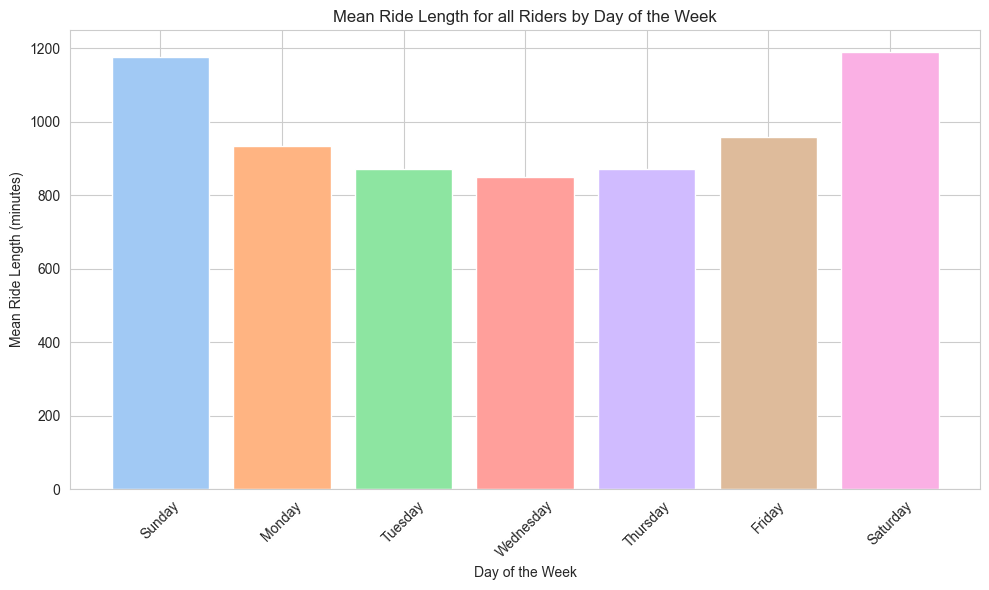

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(days_of_week, mean_ride_length_per_day_all_users, color=sns.color_palette("pastel"))
plt.xlabel('Day of the Week')
plt.ylabel('Mean Ride Length (minutes)')
plt.title('Mean Ride Length for all Riders by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Average ride_length for users by day_of_week for  members.

In [30]:
mean_ride_length_per_day_members=members_df.groupby('day_of_week')['ride_length'].mean()
print("members",mean_ride_length_per_day_members)

members day_of_week
1    816.911501
2    703.807898
3    702.037742
4    699.055738
5    704.091127
6    723.131187
7    827.962534
Name: ride_length, dtype: float64


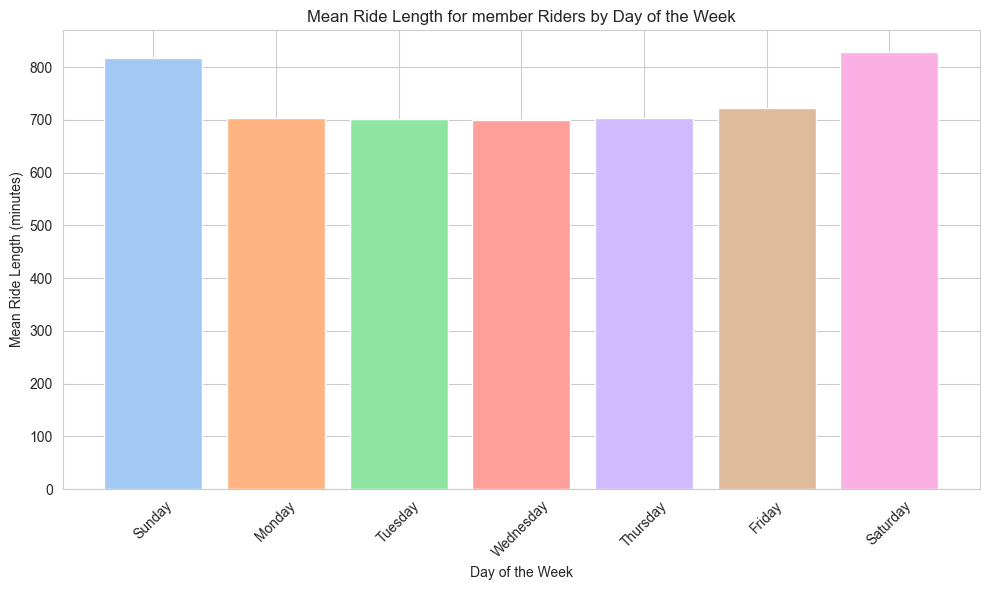

In [31]:

plt.figure(figsize=(10, 6))
plt.bar(days_of_week, mean_ride_length_per_day_members, color=sns.color_palette("pastel"))
plt.xlabel('Day of the Week')
plt.ylabel('Mean Ride Length (minutes)')
plt.title('Mean Ride Length for member Riders by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Average ride_length for users by day_of_week for casuals.

In [32]:
mean_ride_length_per_day_casuals=casuals_df.groupby('day_of_week')['ride_length'].mean()
print("casuals",mean_ride_length_per_day_casuals)

casuals day_of_week
1    1565.739062
2    1376.398958
3    1239.253141
4    1170.647970
5    1198.648890
6    1318.177463
7    1543.761383
Name: ride_length, dtype: float64


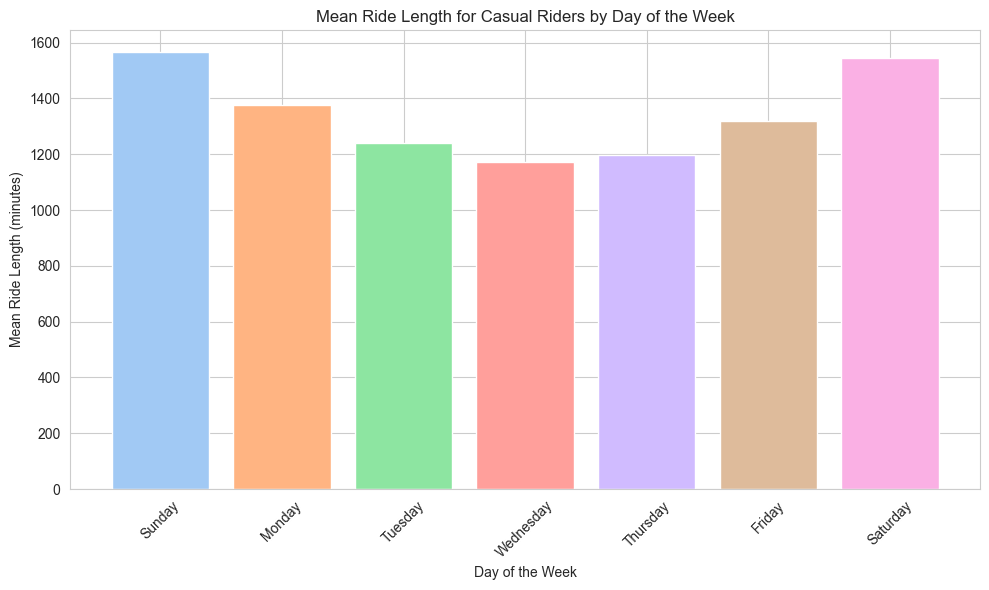

In [33]:


plt.figure(figsize=(10, 6))
plt.bar(days_of_week, mean_ride_length_per_day_casuals, color=sns.color_palette("pastel"))
plt.xlabel('Day of the Week')
plt.ylabel('Mean Ride Length (minutes)')
plt.title('Mean Ride Length for Casual Riders by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The highest Members Average ride_length is 00:14:03.464133858 in 7 "Saturday"<br>
The highest Casuals Average ride_length is 00:33:09.021699462 in 1 "Sunday"

#the Members have shorter ride_length than Casuals


The number of rides for users by day_of_week

In [34]:
The_number_of_rides_for_users_by_day_of_week=data.groupby('day_of_week')['ride_id'].count()

The_number_of_rides_for_users_by_day_of_week

day_of_week
1    650066
2    658786
3    697947
4    712105
5    735894
6    725855
7    799108
Name: ride_id, dtype: int64

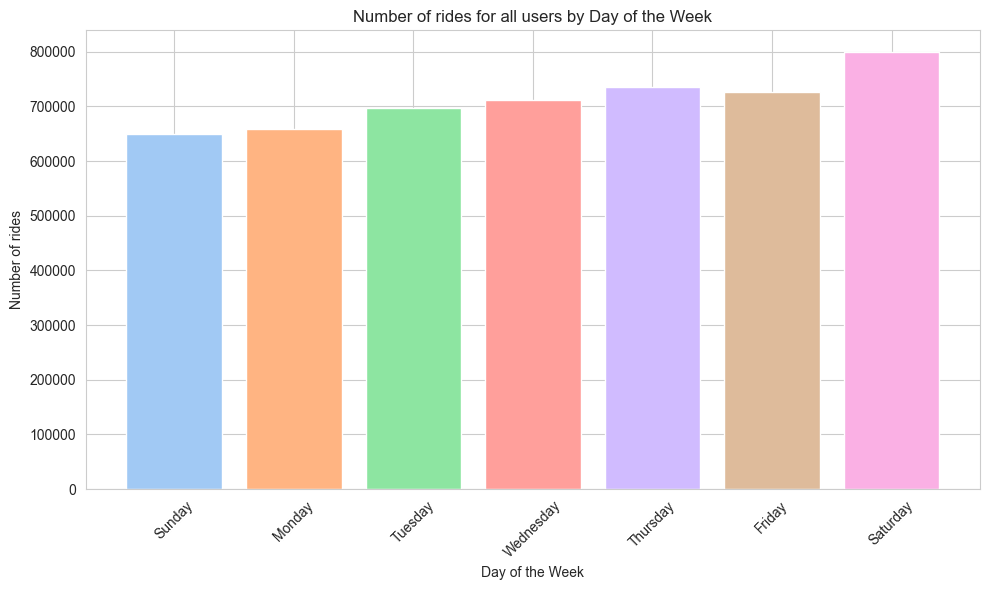

In [35]:

plt.figure(figsize=(10, 6))
plt.bar(days_of_week, The_number_of_rides_for_users_by_day_of_week, color=sns.color_palette("pastel"))
plt.xlabel('Day of the Week')
plt.ylabel('Number of rides')
plt.title('Number of rides for all users by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

The number of rides for members by day_of_week

In [36]:
The_number_of_rides_for_members_by_day_of_week=members_df.groupby('day_of_week')['ride_id'].count()

The_number_of_rides_for_members_by_day_of_week

day_of_week
1    338118
2    433166
3    478188
4    486846
5    487849
6    439372
7    396550
Name: ride_id, dtype: int64

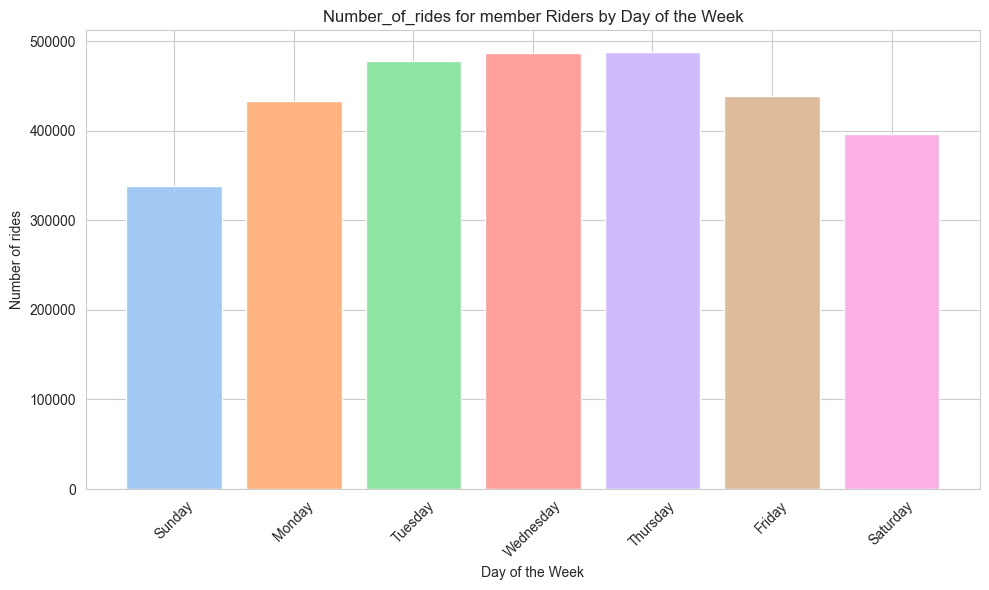

In [37]:

plt.figure(figsize=(10, 6))
plt.bar(days_of_week, The_number_of_rides_for_members_by_day_of_week, color=sns.color_palette("pastel"))
plt.xlabel('Day of the Week')
plt.ylabel('Number of rides')
plt.title('Number_of_rides for member Riders by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

The number of rides for casuals by day_of_week

In [38]:
The_number_of_rides_for_casuals_by_day_of_week=casuals_df.groupby('day_of_week')['ride_id'].count()

The_number_of_rides_for_casuals_by_day_of_week

day_of_week
1    311948
2    225620
3    219759
4    225259
5    248045
6    286483
7    402558
Name: ride_id, dtype: int64

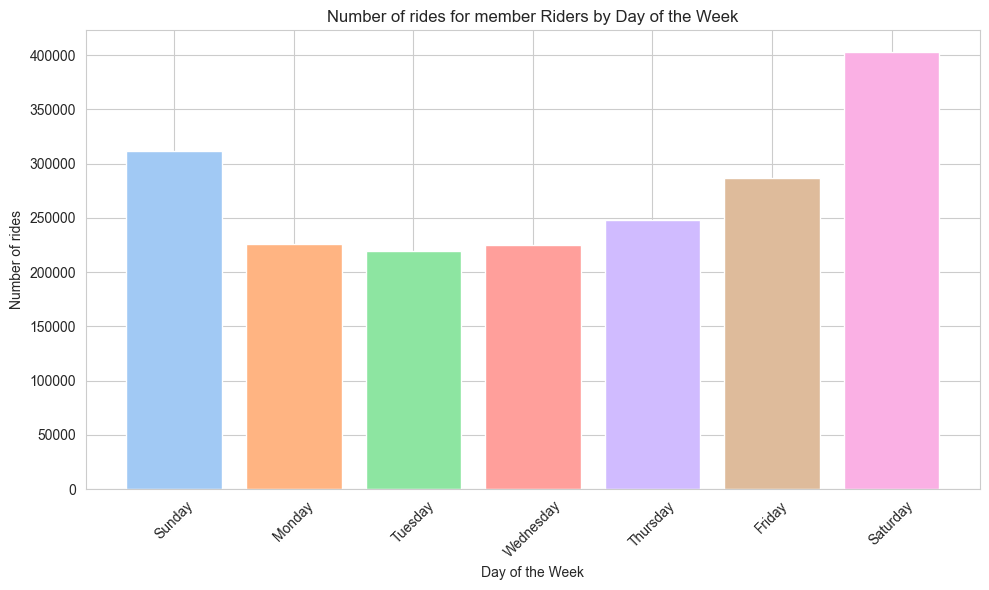

In [39]:

plt.figure(figsize=(10, 6))
plt.bar(days_of_week, The_number_of_rides_for_casuals_by_day_of_week, color=sns.color_palette("pastel"))
plt.xlabel('Day of the Week')
plt.ylabel('Number of rides')
plt.title('Number of rides for member Riders by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

**electric bikes**

In [52]:
len(members_df[members_df['rideable_type']=='electric_bike'])




1152113

In [53]:
len(members_df[members_df['rideable_type']=='classic_bike'])


1907976

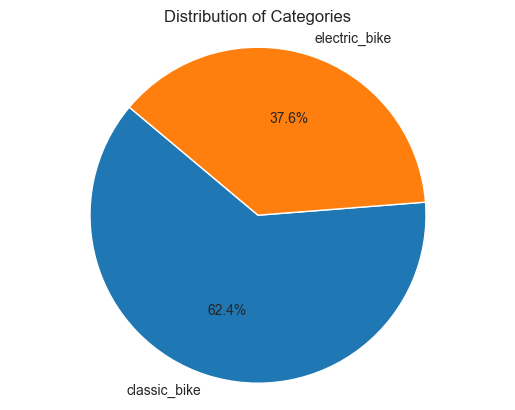

In [58]:
category_counts = members_df['rideable_type'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title("Distribution of bike type for members")

# Display the pie chart
plt.show()

In [55]:
len(casuals_df[casuals_df['rideable_type']=='electric_bike'])


819354

In [56]:
len(casuals_df[casuals_df['rideable_type']=='classic_bike'])


943722

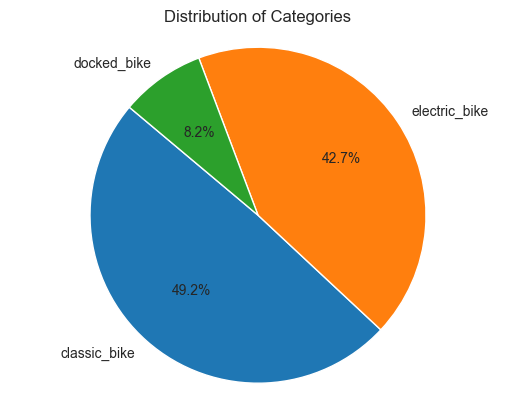

In [59]:
category_counts = casuals_df['rideable_type'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title("Distribution of bike type for casuals ")

# Display the pie chart
plt.show()

**How do annual members and casual riders use Cyclistic bikes differently?**<br>
-Following the analysis, it became evident that the members prefere to cycle during on the days of the week(Monday-Tuesday-Wednsesday-Thursday-Friday)<br>whereas casual riders show a preference for week ends (Satudray-Sunday).
-During the weekends, all riders go on longer rides compared to weekdays

**Why would casual riders buy Cyclistic annual memberships?**<br>
Casual riders might opt for Cyclistic annual memberships due to the potential for cost savings over individual rides, as well as the convenience of unlimited access to bikes without the need for frequent pass purchases.

**How can Cyclistic use digital media to influence casual riders to become members?**<br>
Cyclistic can leverage digital media through targeted online campaigns, social media platforms,<br>
and engaging content to influence casual riders to become members. They could showcase the benefits of annual membership, such as cost savings, convenience


**Conclustion**<br>
Based on the analysis, it's apparent that there is a distinction in riding preferences between the members and casual riders.<br>

Members tend to cycle more on weekdays (Monday to Friday), indicating that they might use cycling as a mode of transportation or fitness during their regular routines. On the other hand, casual riders show a preference for weekends (Saturday and Sunday), suggesting that they might view cycling more as a leisure activity to enjoy during their free time.<br>

This discrepancy could be due to various factors, such as work schedules, commitments, and motivations for cycling.